In [6]:
#%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


In [32]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [2]:
%matplotlib inline
%matplotlib widget
# %pip
# ?'plot'.replace()
%config InlineBackend.figure_format = 'retina'

Hola


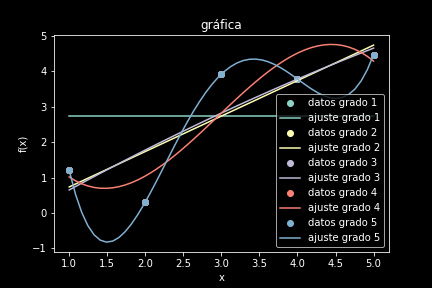

NameError: name 'A' is not defined

NameError: name 'A' is not defined

In [28]:
%run Taller4MC.ipynb

In [ ]:
# %load "Actividad 6(regresión).py"
"""
Created on Tue Mar 29 17:36:31 2022

@author: Asus
"""
#Porfavor antes de correr el codigo siga los siguientes pasos:
#-En la terminal de anaconda si la tiene, o en la terminal de windows(si tiene python de microsoft) o en bash(linux o mac), corra los siguientes comandos:
    #pip install Algoritmosnumericos  (mi libreria)
    #pip install tabulate  (para imprimir los pandas)
    #Si no tiene instalado pip visite alguno de los siguientes links:
        #https://technetters.com/como-instalar-pip-para-python-windows/?msclkid=16734b81b5df11ec9c420a0179c4a1b3
        #https://www.solvetic.com/tutoriales/article/9492-como-instalar-pip-en-mac/?msclkid=94fdfc82b5df11ecb68aa89df6926118
        #https://www.bing.com/search?q=instalar+pip+en+linux&qs=n&form=QBRE&sp=-1&pq=instalar+pip+en+linu&sc=1-20&sk=&cvid=12F733100E8B4EA9A7338331A99AAB1A
    
#librerias
import Algoritmosnumericos as Alg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
plt.style.use('dark_background')

#Aclaraciones
print(23*'-')
print(' ')
print('Aclaraciones:')
print('-Al correr este código automáticamente se guardan las imagenes en la carpeta contenida')
print('-Se limpian los datos desde el inicio, por ende el gráfico de las 2 tablas de datos corresponden a los datos limpios;al igual que el pandas de datos, solamente se utilizan los datos desde el dato #57, por eso en la primera imagen(la de datos experimentales) no aparece la parte que es practicamente horizontal')
print(23*'-')
#datos
datos1=pd.read_csv('datos refraccion angulo incidencia.txt')
datos2=pd.read_csv('datos refraccion angulo reflexion.txt')
datos1=datos1[57:]
datos2=datos2[57:]
ang_inc=datos1["θ"][57:]-90
ang_ref=datos2["θ"][57:]+90
x=np.sin(ang_inc*np.pi/180).tolist()
y=np.sin(ang_ref*np.pi/180).tolist()

#Imprimir datos
print('Angúlo incidencia')
print(datos1.to_markdown())
print(23*'-')
print('Angúlo reflexión')
print(datos2.to_markdown())
plt.scatter(datos1['t'],datos1['θ'],label='angulo incidencia')
plt.scatter(datos2['t'],datos2['θ'],label='angulo reflexión')
plt.ylabel('θ')
plt.xlabel('t')
plt.title('θ vs t')
plt.legend()
plt.savefig("imagen 1 (Datos experimentales).png")

#Ajuste no matricial
print(23*'-')
fig,ax = plt.subplots()
ajuste=Alg.regresionlineal(x,y)
Alg.dibujo_reglineal(x,y,0,0, '(No matricial)sin(θ) refl vs sin(θ) inc','sin(θ) inc','sin(θ) refl', ax,'ley de snell')
plt.savefig("imagen 2 (Linealización y regresión lineal metódo no matricial).png")
print('Metódo no matricial')
print('El ajuste es y=',ajuste[0][0],'x+',ajuste[0][1])
print('Incertidumbre m=+-',ajuste[1][0])
print('Incertidumbre b=+-',ajuste[1][1])
print('El coeficiente de correlación de pearson es:',ajuste[2])

#Ajuste matricial
print(23*'-')
fig,a = plt.subplots()
ajuste=Alg.regresion(x,y,1,(1,1))
Alg.dibujo_reg(x,y,1,(1,1),0,0,'(Matricial)sin(θ) refl vs sin(θ) inc','sin(θ) inc','sin(θ) refl','ley de snell',a)
plt.savefig("imagen 3 (Linealización y regresión lineal metódo matricial).png")
print('Metódo matricial')
print('El ajuste es y=',ajuste[0][1],'x+',ajuste[0][0])
print('(se estima la matriz de covarianza ver conclusiones)')
print('Incertidumbre m=+-',ajuste[1][0])
print('Incertidumbre b=+-',ajuste[1][1])
print('El coeficiente de correlación ajustado(ver conclusiones) es:',ajuste[2])

#Ajuste por scipy
print(23*'-')
print('Metódo scipy (curve fit)')
def func(x, m, b):
    return m*x+b
ajuste,covarianza= curve_fit(func,x,y)
desviacionestandar=np.sqrt(np.diag(covarianza))
m=ajuste[0]
b=ajuste[1]
Δm=desviacionestandar[0]
Δb=desviacionestandar[1]
x2=np.linspace(min(x),max(x),1000)
fig,axs=plt.subplots()
axs.plot(x2,x2*m+b,label='ajuste ley de snell')
axs.scatter(x,y,label='datos ley de snell')
axs.set_title('(Scipy) sin(θ) refl vs sin(θ) inc ')
axs.set_xlabel('sin(θ) inc')
axs.set_ylabel('sin(θ) refl')
axs.legend()
r,p=stats.pearsonr(x,y)
print('El ajuste es y=',m,'x+',b)
print('Incertidumbre m=+-',Δm)
print('Incertidumbre b=+-',Δb)
print('El coeficiente de correlación de pearson es:',r)
plt.savefig("imagen 4 (scipy).png")

#Indice de refracción
print(23*'-')
print('La pendiente del ajuste es el indice de refracción de la gelatina sobre el indice de refracción del aire')
print('el indice de refracción del aire se coloca como 1, por ende la pendiente es igual al indice de refracción de la gelatina')
print('el punto de corte debe ser cercano a 0, esto concuerda con las regresiones hechas. Por ende')
print('El índice de refracción obtenido es n=',round(m,5),'sin unidades')

#Conclusión
print(23*'-')
print('Conclusiones:')
print('-Hemos implementado ambos metodos de regresión lineal,adicionalmente vemos que el ajuste cumple las condiciones teóricas del modelo de refracción')
print(' ')
print('-Hay diferencias en las incertidumbres, ya que en el metódo matricial, al no saber(en general) la varianza, usamos la varianza residual para estimar la varianza y hallar la matriz de covarianza')
print('-')
print('-Tambien se encuentran diferencias en el coeficiente de correlación, ya que en el metódo no matricial se utiliza un coeficiente ajustado que solo aumenta con la disminuición del vector error y en el metódo matricial utilizamos el coeficiente de correlación de pearson')
print('')
print('Vemos que las incertidumbres son iguales en el metódo matricial y en la libreria de scipy, esto quiere decir que scipy tambien utiliza el metódo para estimar la matriz de covarianzas y nuestros resultados son correctos')
print('')
print('Por último vemos que el coeficiente de correlación  de pearson de scipy es igual al predicho por nosotros')
print(23*'-')
print('Fuentes:')
print('-Mi propia libreria, ahí puede ver la implementación:','https://github.com/Ratabart666/Ratabart666/tree/main/proyecto%20de%20aplicaciones')
print(' ')
print('-Implementación para el coeficiente de correlación  e incertidumbres metódo matricial:http://www1.monografias.com/docs115/regresion-lineal-multiple/regresion-lineal-multiple2.shtml')
print(' ')
print('-Implementación coeficiente de correlación de pearson:https://glosarios.servidor-alicante.com/terminos-estadistica/coeficiente-de-correlacion-lineal-de-pearson')
print(' ')
print('-Implementación incertidumbres metódo no matricial:http://insertidumbre-reg-lin.blogspot.com/')











In [23]:
ls

 El volumen de la unidad C es OS
 El número de serie del volumen es: 20A8-6EF2

 Directorio de C:\Users\Asus\OneDrive - Universidad de los Andes\semestre 3\metodos comp

06/04/2022  18:24    <DIR>          .
30/03/2022  20:52    <DIR>          ..
06/04/2022  17:29    <DIR>          .ipynb_checkpoints
30/03/2022  15:32    <DIR>          __pycache__
01/02/2022  18:31               770 Actividad 1 bash(linux).txt
25/02/2022  11:36             1.413 Actividad 2(programación orientada a objetos).py
28/02/2022  00:06             8.521 Actividad 3(metódos y derivadas númericas).py
26/03/2022  17:36             5.255 Actividad 4 (Interpolación de Lagrange).py
25/03/2022  10:36            17.241 Actividad 5(matrices).py
06/04/2022  14:28             6.544 Actividad 6(regresión).py
06/04/2022  07:32    <DIR>          Already-known-algorithms
06/04/2022  08:41             4.830 datos refraccion angulo incidencia.txt
06/04/2022  08:41             4.945 datos refraccion angulo reflexion.txt
02/04/2

In [25]:
less datos refraccion angulo incidencia.txt